In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [87]:
data_train_path = r"C:\Users\tshan\Downloads\Fruits_Vegetables\Fruits_Vegetables\train"
data_test_path = r"C:\Users\tshan\Downloads\Fruits_Vegetables\Fruits_Vegetables\test"
data_val_path = r"C:\Users\tshan\Downloads\Fruits_Vegetables\Fruits_Vegetables\validation"

In [88]:
img_width = 180
img_height = 180


In [89]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 3115 files belonging to 36 classes.


In [90]:
data_cat = data_train.class_names

In [91]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size=(img_height, img_width),
    batch_size=32,
    shuffle=False,
    validation_split=False
)

Found 351 files belonging to 36 classes.


In [92]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_height, img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


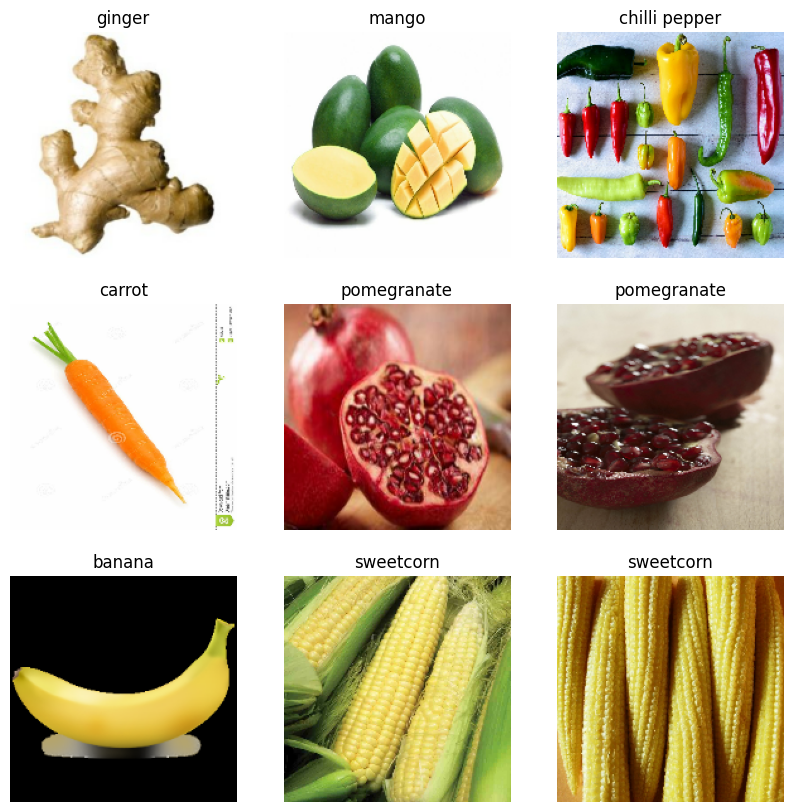

In [93]:
plt.figure(figsize=(10, 10))

for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')



In [94]:
from tensorflow.keras.models import Sequential

In [95]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [99]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [100]:
model.compile(optimizer ='adam', loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [101]:
epochs_size= 25

history = model.fit(data_train,validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 46s 447ms/step - accuracy: 0.0528 - loss: 4.3938 - val_accuracy: 0.3504 - val_loss: 2.3873
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 361ms/step - accuracy: 0.2572 - loss: 2.5982 - val_accuracy: 0.5613 - val_loss: 1.6453
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 384ms/step - accuracy: 0.4397 - loss: 1.9659 - val_accuracy: 0.7493 - val_loss: 0.9592
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 32s 315ms/step - accuracy: 0.5924 - loss: 1.3675 - val_accuracy: 0.8120 - val_loss: 0.6859
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 278ms/step - accuracy: 0.7324 - loss: 0.8931 - val_accuracy: 0.8946 - val_loss: 0.5238
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 285ms/step - accuracy: 0.8254 - loss: 0.5655 - val_accuracy: 0.9145 - val_loss: 0.3892
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 272ms/step - accuracy: 0.8746 - loss: 0.4370 - val_accuracy: 0.9459 - val_loss: 0.3533
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 280ms/step - accuracy: 0.9187 - loss: 0.3067 - val_accu

In [ ]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
data_val

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

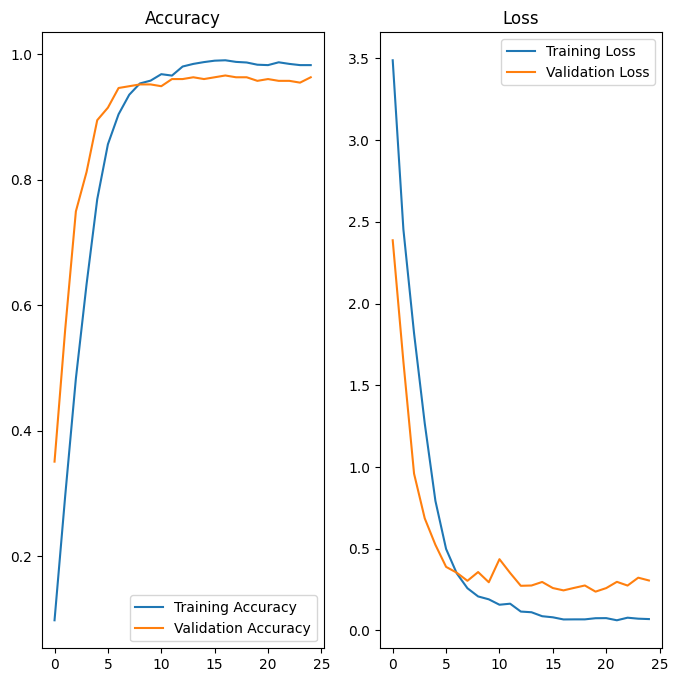

In [104]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

In [133]:
image = 'apple.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
img_arr = tf.keras.utils.img_to_array(image)
img_bat = tf.expand_dims(img_arr, 0)

In [134]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


In [135]:
score = tf.nn.softmax(predict)

In [132]:
print("Veg/fruit in image is {} with accuracy of {:0.2f}%".format(data_cat[np.argmax(score)], np.max(score) * 100))

Veg/fruit in image is sweetcorn with accuracy of 89.31%
